# Descriptive Statistics

In [1]:
# importing necessary libraries
import pandas as pd

# reading the data from the file
df = pd.read_excel('Data Preprocessing & Cleaning\\all_city.xlsx')

In [2]:
df.describe()

,Fuel type,Body type,Kilometers driven,transmission,ownerNo,Ownership details,model,modelYear,centralVariantId,variantName,price,Registration Year,Insurance Validity,Mileage(kmpl),Engine(CC),Max Power(bhp),Torque(Nm),City
count,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000,7936.000000
mean,3.033644,5.908896,-0.017723,0.744960,1.350806,1.350806,143.814012,0.027055,4977.842238,1166.793977,-0.116845,0.016186,3.798639,0.039967,-0.103703,-0.112765,-0.095238,2.428679
std,1.410824,2.713989,0.456337,0.435911,0.629395,0.629395,78.661103,0.928075,2740.623582,667.834302,0.500085,0.955004,1.450821,0.850738,0.816276,0.754886,0.840000,1.709665
min,0.000000,0.000000,-0.796341,0.000000,0.000000,0.000000,0.000000,-2.678569,5.000000,0.000000,-0.615098,-2.792682,0.000000,-2.843404,-2.983825,-1.535755,-1.580739,0.000000
25%,1.000000,3.000000,-0.386435,0.000000,1.000000,1.000000,77.000000,-0.638393,2015.000000,531.000000,-0.402692,-0.687954,2.000000,-0.509939,-0.476947,-0.568862,-0.619639,1.000000
50%,4.000000,8.000000,-0.071274,1.000000,1.000000,1.000000,147.000000,0.126673,5375.000000,1268.000000,-0.261088,0.101319,5.000000,-0.008412,-0.472759,-0.361207,-0.363833,2.000000
75%,4.000000,9.000000,0.283914,1.000000,2.000000,2.000000,184.000000,0.636717,7122.000000,1795.000000,-0.046557,0.627502,5.000000,0.563671,0.153437,0.268246,0.202595,4.000000
max,4.000000,10.000000,2.714488,1.000000,5.000000,5.000000,314.000000,1.656805,11098.000000,2154.000000,2.995810,1.679866,6.000000,2.867261,2.953516,2.943965,2.943374,5.000000


In [3]:
df.median()         # finding the median of the data

Fuel type                4.000000
Body type                8.000000
Kilometers driven       -0.071274
transmission             1.000000
ownerNo                  1.000000
Ownership details        1.000000
model                  147.000000
modelYear                0.126673
centralVariantId      5375.000000
variantName           1268.000000
price                   -0.261088
Registration Year        0.101319
Insurance Validity       5.000000
Mileage(kmpl)           -0.008412
Engine(CC)              -0.472759
Max Power(bhp)          -0.361207
Torque(Nm)              -0.363833
City                     2.000000
dtype: float64

In [4]:
df.mode()           # finding the mode of the data

,Fuel type,Body type,Kilometers driven,transmission,ownerNo,Ownership details,model,modelYear,centralVariantId,variantName,price,Registration Year,Insurance Validity,Mileage(kmpl),Engine(CC),Max Power(bhp),Torque(Nm),City
0,4,3,0.824042,1,1,1,63,0.381695,10403,1806,-0.225687,0.36441,5,-0.071977,-0.476947,-0.361207,-0.592231,3


# Data Visualization

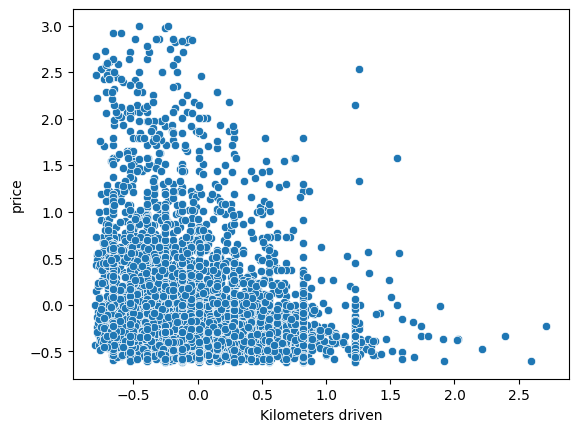

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Kilometers driven vs price
sns.scatterplot(x='Kilometers driven', y='price', data=df)
plt.show()

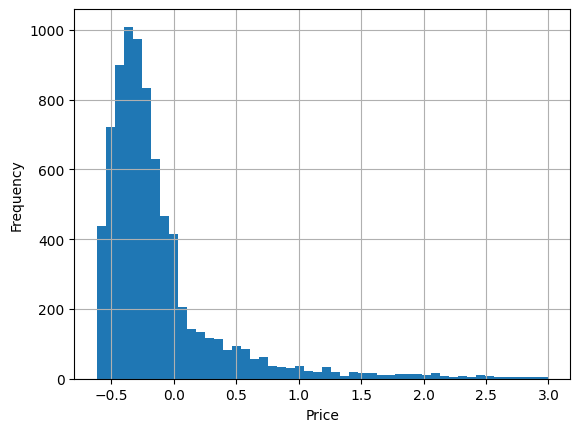

In [6]:
df['price'].hist(bins=50)   # Histogram of price column with 50 bins 
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

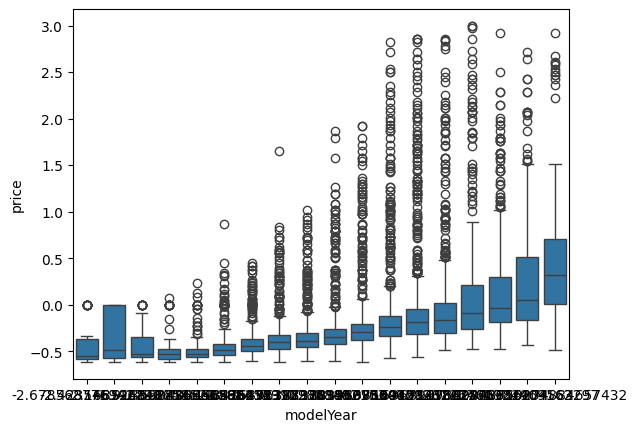

In [7]:
sns.boxplot(x='modelYear', y='price', data=df)
plt.show()

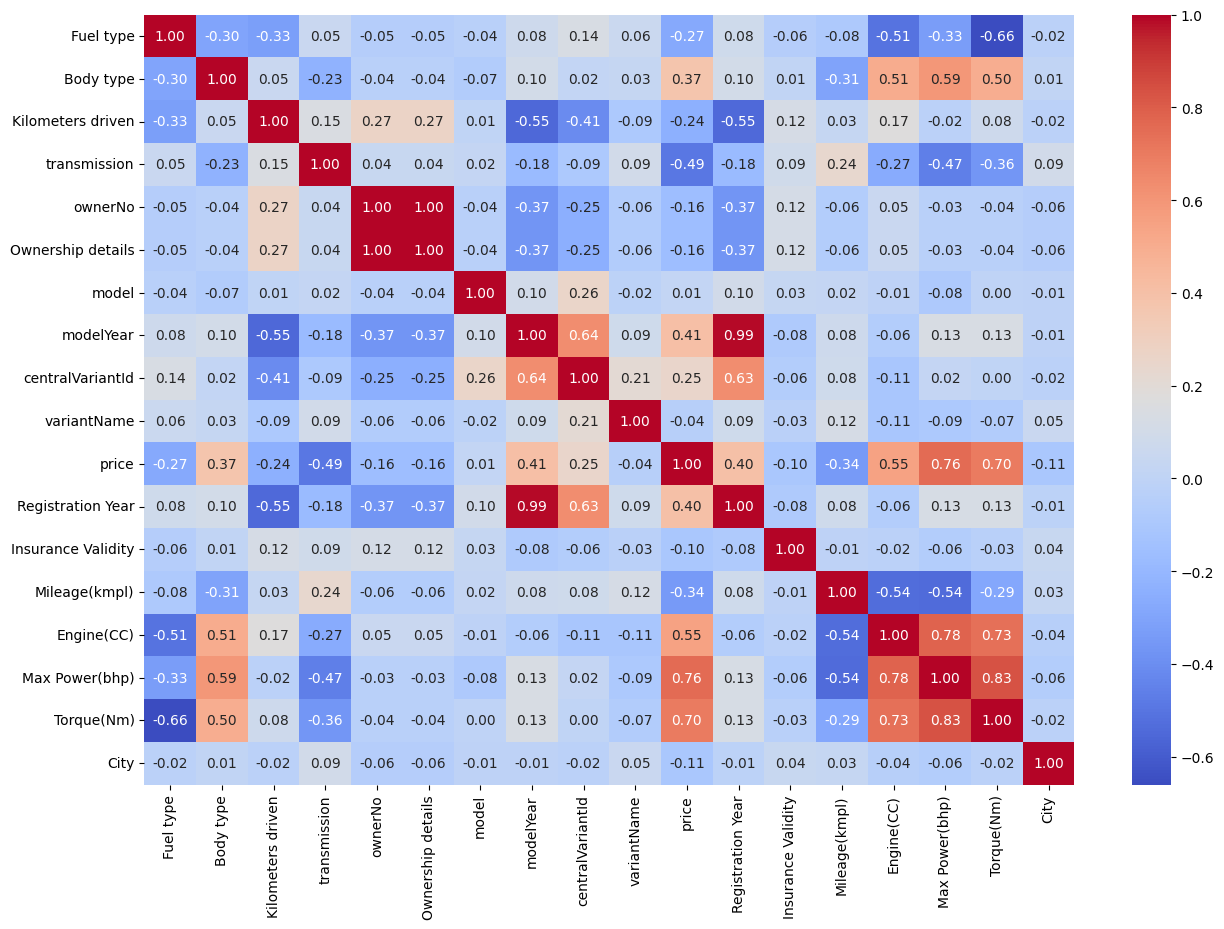

In [8]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(15,10))  # Increase the size of the plot

# Plotting heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.show()

## Feature Selection

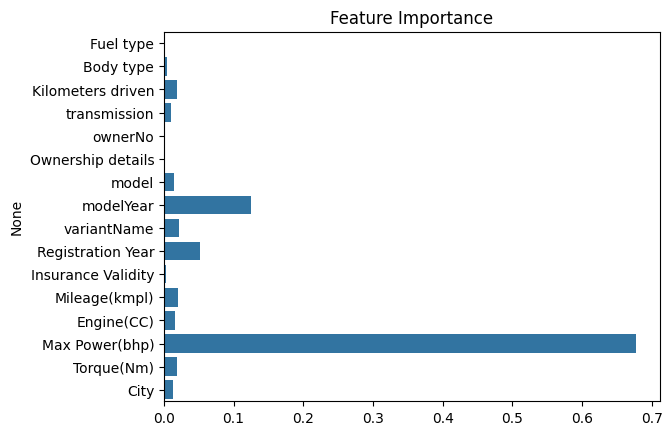

In [9]:
from sklearn.ensemble import  RandomForestRegressor

# feature and target variable
df1 = df.copy()
x = df1.drop(columns=['price','centralVariantId'])      # Dropping columns not relevant for training
y = df1['price']

# Random Forest Model
model = RandomForestRegressor()
model.fit(x, y)

# Feature importance
importance = model.feature_importances_
feature_names = x.columns

# plotting feature importance
sns.barplot(x=importance, y=feature_names)
plt.title('Feature Importance')
plt.show()

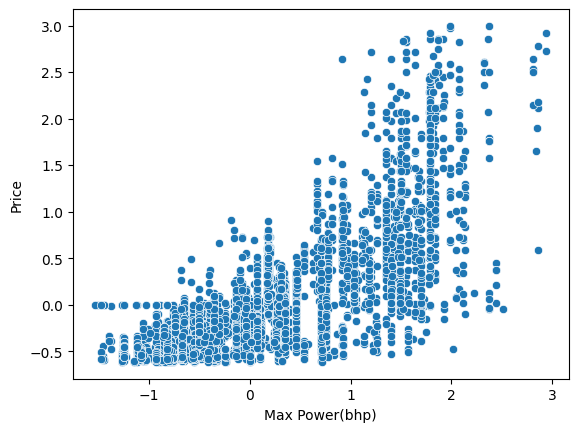

In [11]:
# Scatter plot of Max Power (bhp) vs Price
sns.scatterplot(data=df, x='Max Power(bhp)', y='price')
plt.ylabel('Price')
plt.show()